
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of investments options from the dow30 and alabama.  Construct portfolios from the Investment Options in the dow30+alabama and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['dow30-galaxy', 'alabama-galaxy']
risk_free_rate = 0
annual_returns = '5 Yr'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,MMM,3M,US Stocks:Industrials,43.26,73.71,31.04,4.19,7.28,16.66,10.17,22.06,7.28,0.33
1,AXP,American Express,US Stocks:Financials,90.24,59.22,57.24,20.21,21.88,17.71,10.55,30.31,21.88,0.72
2,AMGN,Amgen,US Stocks:Healthcare,-41.32,20.33,10.26,11.63,11.27,16.15,11.12,24.36,11.27,0.46
3,AAPL,Apple Inc.,US Stocks:Technology,-17.18,16.35,57.28,39.50,40.71,22.00,12.70,33.48,40.71,1.22
4,BA,Boeing,US Stocks:Industrials,198.04,57.13,35.60,-10.38,16.64,30.74,15.13,50.68,16.64,0.33
5,CAT,Caterpillar Inc.,US Stocks:Industrials,35.77,53.67,93.70,20.12,30.63,15.92,9.51,26.97,30.63,1.14
6,CVX,Chevron Corporation,US Stocks:Energy,9.38,2.88,19.02,0.69,6.06,25.35,16.03,33.48,6.06,0.18
7,CSCO,Cisco Systems,US Stocks:Technology,95.60,92.22,19.17,10.78,16.87,16.53,8.79,27.21,16.87,0.62
8,KO,The Coca-Cola Company,US Stocks:Consumer Staples,62.86,55.41,21.32,12.58,8.19,8.79,4.34,18.96,8.19,0.43
9,DOW,Dow Inc.,US Stocks:Materials,68.22,63.02,73.02,73.02,73.02,22.18,10.47,39.10,73.02,1.87


In [6]:
# rank
rank = bb.rank(df, rank_by='Sharpe Ratio')
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
19,MSFT,Microsoft,US Stocks:Technology,26.64,38.77,38.43,36.84,38.99,21.79,12.31,18.27,38.99,2.13
9,DOW,Dow Inc.,US Stocks:Materials,68.22,63.02,73.02,73.02,73.02,22.18,10.47,39.10,73.02,1.87
3,AAPL,Apple Inc.,US Stocks:Technology,-17.18,16.35,57.28,39.50,40.71,22.00,12.70,33.48,40.71,1.22
5,CAT,Caterpillar Inc.,US Stocks:Industrials,35.77,53.67,93.70,20.12,30.63,15.92,9.51,26.97,30.63,1.14
28,WMT,Walmart,US Stocks:Consumer Discretionary,16.56,50.45,18.02,20.65,17.48,14.88,9.23,15.59,17.48,1.12
24,UNH,UnitedHealth Group,US Stocks:Healthcare,-18.23,89.19,38.22,20.22,26.38,12.34,9.34,23.64,26.38,1.12
26,V,Visa Inc.,US Stocks:Financials,6.82,31.05,19.57,20.79,24.37,16.85,11.28,23.64,24.37,1.03
21,PG,Procter & Gamble,US Stocks:Consumer Staples,24.84,39.12,20.02,25.78,13.92,16.08,9.70,15.30,13.92,0.91
17,MCD,McDonald's,US Stocks:Consumer Staples,-1.88,64.00,23.63,16.13,16.92,13.30,9.83,18.68,16.92,0.91
20,NKE,"Nike, Inc.",US Stocks:Consumer Discretionary,17.62,1.99,33.15,23.11,21.04,20.63,11.75,23.52,21.04,0.89


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])[:20]
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Top10 Portfolio'
}
top10 = list(rank['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': 'Sharpe Ratio'},
    'Investment Option': {'weight_by': 'Equal'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,MSFT,DOW,AAPL,CAT,WMT,UNH,V,PG,MCD,NKE,...,JPM,HON,AXP,CRM,GS,CSCO,RF,MRK,JNJ,Ranked Portfolio
Annual Returns,38.99,73.02,40.71,30.63,17.48,26.38,24.37,13.92,16.92,21.04,...,23.80,18.50,21.88,23.33,21.75,16.87,21.67,9.70,10.61,28.59
Std Dev,18.27,39.10,33.48,26.97,15.59,23.64,23.64,15.30,18.68,23.52,...,27.73,24.80,30.31,32.88,34.15,27.21,37.37,17.21,18.83,22.24
Sharpe Ratio,2.13,1.87,1.22,1.14,1.12,1.12,1.03,0.91,0.91,0.89,...,0.86,0.75,0.72,0.71,0.64,0.62,0.58,0.56,0.56,1.29
Weight,0.06,0.12,0.06,0.06,0.05,0.04,0.03,0.05,0.05,0.05,...,0.03,0.06,0.03,0.06,0.03,0.06,0.03,0.04,0.04,1.00
Worst Typical Down Year,2.45,-5.18,-26.25,-23.31,-13.70,-20.90,-22.91,-16.68,-20.44,-26.00,...,-31.66,-31.10,-38.74,-42.43,-46.55,-37.55,-53.07,-24.72,-27.05,-15.89
Black Swan,-15.82,-44.28,-59.73,-50.28,-29.29,-44.54,-46.55,-31.98,-39.12,-49.52,...,-59.39,-55.90,-69.05,-75.31,-80.70,-64.76,-90.44,-41.93,-45.88,-38.13


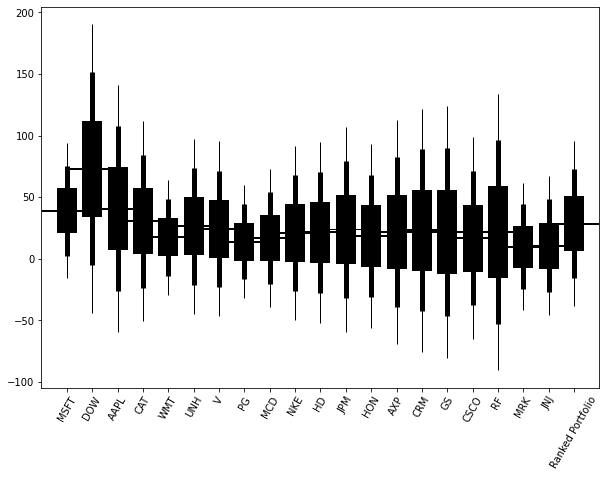

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

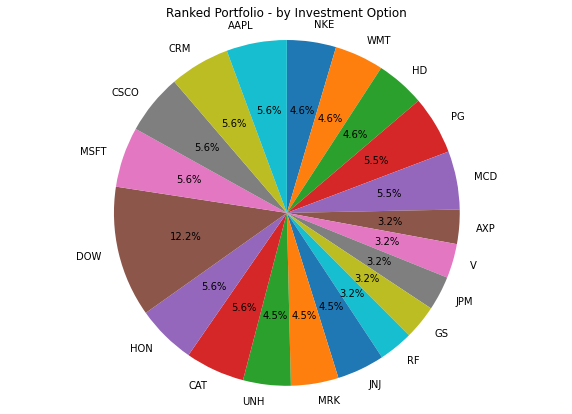

NKE    0.05
WMT    0.05
HD     0.05
PG     0.05
MCD    0.05
AXP    0.03
V      0.03
JPM    0.03
GS     0.03
RF     0.03
JNJ    0.04
MRK    0.04
UNH    0.04
CAT    0.06
HON    0.06
DOW    0.12
MSFT   0.06
CSCO   0.06
CRM    0.06
AAPL   0.06



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    MSFT                           0.0564
    DOW                            0.1224
    AAPL                           0.0564
    CAT                            0.0555
    WMT                            0.0459
    UNH                            0.0445
    V                              0.0321
    PG                             0.0546
    MCD                            0.0546
    NKE                            0.0459
    HD                             0.0459
    JPM                            0.0321
    HON                            0.0555
    AXP                            0.0321
    CRM                            0.0564
    GS                             0.0321
    CSCO                           0.0564
    RF                             0.0321
    MRK                            0.0445
    JNJ                            0.0445


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': -20
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer...................

Ranked Portfolio Metrics:           
    max_sharpe_ratio            1.44
    annual_return              30.50
    std_dev                    21.12
    worst typical down year   -11.74
    black_swan                -32.87


Ranked Portfolio Weights:
    MSFT                           0.1400
    DOW                            0.1300
    AAPL                           0.0000
    CAT                            0.1200
    WMT                            0.0800
    UNH                            0.1400
    V                              0.0000
    PG                             0.0700
    MCD                            0.0000
    NKE                            0.0000
    HD                             0.0500
    JPM                            0.0700
    HON                            0.0000
    AXP                            0.0000
    CRM                            0.0000
    GS                             0.0300
    CSCO                           0.050

### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).